# A simple feed forward model

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import os 
import shutil

import copy

import tensorflow as tf
import tensorflow.keras as K

## Load train and test sets

In [2]:
#place holder data: 100 samples with 5000 genes
X_cell_train = np.random.rand(100,5000)*100
y_cell_train = X_cell_train.mean(axis=1)+np.random.rand(100,)*10


In [5]:
X_cell_test = np.random.rand(10,5000)*100
y_cell_test = X_cell_test.mean(axis=1)+np.random.rand(10,)*10


In [14]:
#place holder patient data: 50 samples with 5000 genes
X_pt_train = np.random.rand(50,5000)*80
y_pt_train = X_pt_train.mean(axis=1)+np.random.rand(50,)*40

In [15]:
X_pt_test = np.random.rand(10,5000)*80
y_pt_test = X_pt_test.mean(axis=1)+np.random.rand(10,)*40

# Train NN on cell line

In [8]:
# number of genes 
N = X_cell_train.shape[1]

model = K.Sequential([
    K.layers.Dropout(0.2, input_shape=(N,)),
    K.layers.Dense(1024, activation='relu', kernel_regularizer=K.regularizers.l2(l=0.001)),
    K.layers.Dropout(0.5),
    K.layers.Dense(128, activation='relu', kernel_regularizer=K.regularizers.l2(l=0.001)),
    K.layers.Dropout(0.5),
    K.layers.Dense(32, activation='relu', kernel_regularizer=K.regularizers.l2(l=0.001)),
    K.layers.Dense(1, kernel_regularizer=K.regularizers.l2(l=0.001))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [6]:
history = model.fit(X_cell_train, y_cell_train, epochs=100, validation_data=(X_cell_test, y_cell_test))

Epoch 1/100
4/4 [==============================] - 2s 314ms/step - loss: 455254.0947 - root_mean_squared_error: 626.2181 - val_loss: 15367.1377 - val_root_mean_squared_error: 123.9566
Epoch 2/100
4/4 [==============================] - 0s 79ms/step - loss: 66801.7883 - root_mean_squared_error: 257.9433 - val_loss: 2430.7690 - val_root_mean_squared_error: 49.2835
Epoch 3/100
4/4 [==============================] - 0s 83ms/step - loss: 64504.4492 - root_mean_squared_error: 253.8748 - val_loss: 23478.1328 - val_root_mean_squared_error: 153.2195
Epoch 4/100
4/4 [==============================] - 0s 95ms/step - loss: 68627.7625 - root_mean_squared_error: 261.7113 - val_loss: 496.6357 - val_root_mean_squared_error: 22.2422
Epoch 5/100
4/4 [==============================] - 0s 80ms/step - loss: 50086.7805 - root_mean_squared_error: 223.7433 - val_loss: 83.0549 - val_root_mean_squared_error: 9.0071
Epoch 6/100
4/4 [==============================] - 0s 86ms/step - loss: 26568.8789 - root_mean_squ

4/4 [==============================] - 0s 93ms/step - loss: 508.5426 - root_mean_squared_error: 22.4761 - val_loss: 130.0868 - val_root_mean_squared_error: 11.3197
Epoch 48/100
4/4 [==============================] - 0s 91ms/step - loss: 477.2228 - root_mean_squared_error: 21.7081 - val_loss: 153.3488 - val_root_mean_squared_error: 12.3044
Epoch 49/100
4/4 [==============================] - 0s 82ms/step - loss: 471.7377 - root_mean_squared_error: 21.6638 - val_loss: 138.2433 - val_root_mean_squared_error: 11.6744
Epoch 50/100
4/4 [==============================] - 0s 101ms/step - loss: 615.2510 - root_mean_squared_error: 24.7199 - val_loss: 124.1088 - val_root_mean_squared_error: 11.0525
Epoch 51/100
4/4 [==============================] - 0s 84ms/step - loss: 656.2202 - root_mean_squared_error: 25.5770 - val_loss: 210.7405 - val_root_mean_squared_error: 14.4495
Epoch 52/100
4/4 [==============================] - 0s 82ms/step - loss: 541.3591 - root_mean_squared_error: 23.2173 - val_loss

4/4 [==============================] - 0s 89ms/step - loss: 431.2588 - root_mean_squared_error: 20.6827 - val_loss: 27.2087 - val_root_mean_squared_error: 5.0256
Epoch 94/100
4/4 [==============================] - 0s 83ms/step - loss: 292.7073 - root_mean_squared_error: 16.9669 - val_loss: 8.1548 - val_root_mean_squared_error: 2.4906
Epoch 95/100
4/4 [==============================] - 0s 99ms/step - loss: 583.5381 - root_mean_squared_error: 24.1098 - val_loss: 15.6753 - val_root_mean_squared_error: 3.7045
Epoch 96/100
4/4 [==============================] - 0s 79ms/step - loss: 377.3365 - root_mean_squared_error: 19.3694 - val_loss: 152.9606 - val_root_mean_squared_error: 12.2886
Epoch 97/100
4/4 [==============================] - 0s 100ms/step - loss: 450.0145 - root_mean_squared_error: 21.0964 - val_loss: 120.1928 - val_root_mean_squared_error: 10.8739
Epoch 98/100
4/4 [==============================] - 0s 82ms/step - loss: 381.9651 - root_mean_squared_error: 19.4810 - val_loss: 6.610

# Eval performance on cell line test set

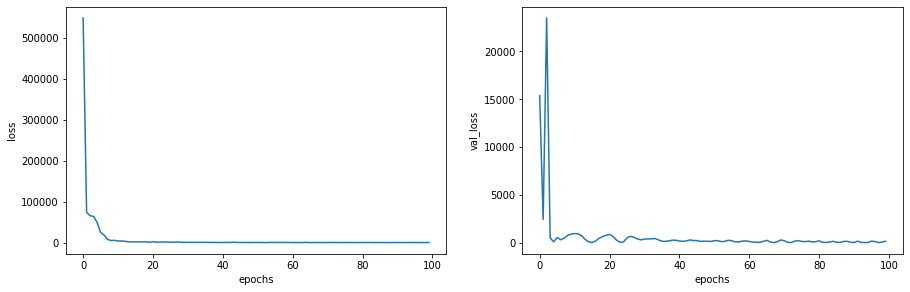

In [12]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
perf_dict = history.history
loss = perf_dict['loss']
val_loss = perf_dict['val_loss']
ax1.plot(loss)
ax2.plot(val_loss)
ax1.set_xlabel('epochs')
ax2.set_xlabel('epochs')

ax1.set_ylabel('loss')
ax2.set_ylabel('val_loss')
plt.show()

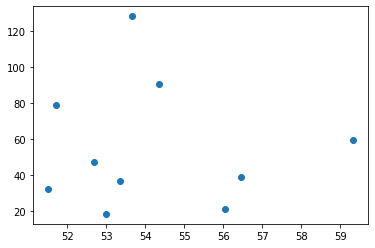

In [13]:
plt.scatter(y_cell_test,model.predict(X_cell_test))

# Feature transfer patient data
Freeze network except the last layer, then train on patient data

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_3 (Dropout)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              5121024   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               131200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [11]:
model.trainable = False
model.layers[-1].trainable = True

layers = [(layer, layer.name, layer.trainable) for layer in model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])      

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.layers.core.Dropout o...,dropout_3,False
1,<tensorflow.python.keras.layers.core.Dense obj...,dense_3,False
2,<tensorflow.python.keras.layers.core.Dropout o...,dropout_4,False
3,<tensorflow.python.keras.layers.core.Dense obj...,dense_4,False
4,<tensorflow.python.keras.layers.core.Dropout o...,dropout_5,False
5,<tensorflow.python.keras.layers.core.Dense obj...,dense_5,False
6,<tensorflow.python.keras.layers.core.Dense obj...,dense_6,True


In [16]:
history_pt = model.fit(X_pt_train, y_pt_train, epochs=100, validation_data=(X_pt_test, y_pt_test))

Epoch 1/100
2/2 [==============================] - 1s 340ms/step - loss: 8341.6136 - root_mean_squared_error: 90.8768 - val_loss: 196871.7812 - val_root_mean_squared_error: 443.7002
Epoch 2/100
2/2 [==============================] - 0s 142ms/step - loss: 241161.6979 - root_mean_squared_error: 488.8926 - val_loss: 37863.6953 - val_root_mean_squared_error: 194.5810
Epoch 3/100
2/2 [==============================] - 0s 119ms/step - loss: 45642.4870 - root_mean_squared_error: 213.6315 - val_loss: 3434.3918 - val_root_mean_squared_error: 58.5871
Epoch 4/100
2/2 [==============================] - 0s 119ms/step - loss: 35564.2487 - root_mean_squared_error: 188.5789 - val_loss: 3160.7910 - val_root_mean_squared_error: 56.2036
Epoch 5/100
2/2 [==============================] - 0s 143ms/step - loss: 30382.0703 - root_mean_squared_error: 173.9869 - val_loss: 6553.4961 - val_root_mean_squared_error: 80.9417
Epoch 6/100
2/2 [==============================] - 0s 135ms/step - loss: 30973.2083 - root_

Epoch 47/100
2/2 [==============================] - 0s 114ms/step - loss: 983.2045 - root_mean_squared_error: 31.2715 - val_loss: 582.7436 - val_root_mean_squared_error: 24.0991
Epoch 48/100
2/2 [==============================] - 0s 145ms/step - loss: 1154.4702 - root_mean_squared_error: 33.9483 - val_loss: 663.7257 - val_root_mean_squared_error: 25.7245
Epoch 49/100
2/2 [==============================] - 0s 148ms/step - loss: 1185.9080 - root_mean_squared_error: 34.3919 - val_loss: 744.7966 - val_root_mean_squared_error: 27.2547
Epoch 50/100
2/2 [==============================] - 0s 123ms/step - loss: 1001.8069 - root_mean_squared_error: 31.6140 - val_loss: 758.9801 - val_root_mean_squared_error: 27.5137
Epoch 51/100
2/2 [==============================] - 0s 233ms/step - loss: 1190.7305 - root_mean_squared_error: 34.4719 - val_loss: 754.9266 - val_root_mean_squared_error: 27.4400
Epoch 52/100
2/2 [==============================] - 0s 140ms/step - loss: 1013.6923 - root_mean_squared_er

Epoch 93/100
2/2 [==============================] - 0s 131ms/step - loss: 665.7370 - root_mean_squared_error: 25.7571 - val_loss: 721.4131 - val_root_mean_squared_error: 26.8224
Epoch 94/100
2/2 [==============================] - 0s 108ms/step - loss: 813.6643 - root_mean_squared_error: 28.4843 - val_loss: 700.7407 - val_root_mean_squared_error: 26.4342
Epoch 95/100
2/2 [==============================] - 0s 117ms/step - loss: 802.2664 - root_mean_squared_error: 28.2876 - val_loss: 678.8312 - val_root_mean_squared_error: 26.0165
Epoch 96/100
2/2 [==============================] - 0s 141ms/step - loss: 1000.0700 - root_mean_squared_error: 31.5554 - val_loss: 700.8516 - val_root_mean_squared_error: 26.4363
Epoch 97/100
2/2 [==============================] - 0s 121ms/step - loss: 602.3001 - root_mean_squared_error: 24.4853 - val_loss: 723.7021 - val_root_mean_squared_error: 26.8650
Epoch 98/100
2/2 [==============================] - 0s 129ms/step - loss: 558.7613 - root_mean_squared_error:

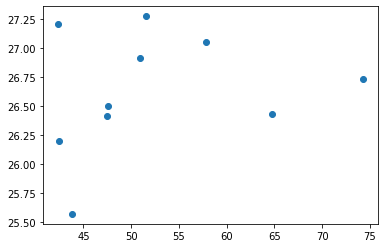

In [17]:
plt.scatter(y_pt_test,model.predict(X_pt_test))

# Save model

In [ ]:
model = K.models.load_model(model_dir)

In [ ]:
model_dir = os.path.join('6.871models', 'simpleNN042721')
shutil.rmtree(model_dir)
model.save(model_dir)
